<module 'matplotlib.pyplot' from 'C:\\Users\\sergi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

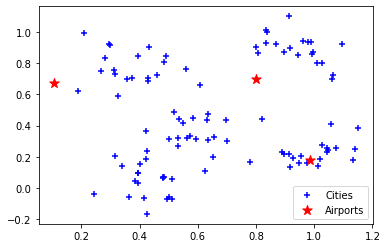

In [1]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [2]:
cities = np.array(list(cities))

In [3]:
airports = np.array(airports)

In [4]:
def find_closest_airports(cities, aiports):
    idx = np.array([0 for _ in range(len(cities))])
    for i in range(len(cities)):
        city_i = cities[i]
        min_distance = float('inf')
        for k in range(len(airports)):
            kth_airport = airports[k]
            distance = (city_i - kth_airport).T.dot(city_i - kth_airport)
            if distance < min_distance:
                min_distance = distance
                idx[i] = k
    return idx

In [5]:
def objective_score(cities, airports):
    score = 0
    idx = find_closest_airports(cities, airports)
    for i in range(len(airports)):
        elements = cities[idx == i]
        for element in elements:
            score += (element - airports[i]).T.dot(element - airports[i])
    return score

In [6]:
def gradient(cities, airports):
    idx = find_closest_airports(cities, airports)
    gradient_of_f = [0 for _ in range(len(airports))]
    for i in range(len(airports)):
        gradient_xi = 0
        gradient_yi = 0
        elements = cities[idx == i]
        gradient_xi = 2 * (np.sum(airports[i][0] - elements[:, 0]))
        gradient_yi = 2 * (np.sum(airports[i][1] - elements[:, 1]))
        gradient_of_f[i] = (gradient_xi, gradient_yi)
    return np.array(gradient_of_f)

In [7]:
def gradient_descent(cities, airports, epochs = 50, learning_rate = .01):
    objective_scores = []
    airport_locations = []
    for _ in range(epochs):
        objective_scores.append(objective_score(cities, airports))
        grad = gradient(cities, airports)
        airports -= learning_rate * grad
        airport_locations.append(airports)
    return objective_scores

In [8]:
objective_scores = gradient_descent(cities, airports)

<module 'matplotlib.pyplot' from 'C:\\Users\\sergi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

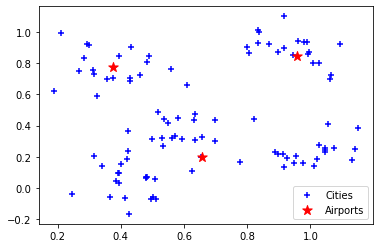

In [9]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [10]:
def plot_objective_functions(objective_scores):
    epochs = len(objective_scores)
    y_max = int(objective_scores[0])
    plt.title('Objective as a function of epoch')
    plt.xlabel('epoch')
    plt.ylabel('objective score')
    plt.yticks(np.arange(0, y_max + 10, 2))
    plt.xticks(np.arange(0, epochs+10, 5))
    x = range(len(objective_scores))
    plt.plot(x, objective_scores, color = 'blue', linestyle = 'None', marker = 'o', markerfacecolor = 'blue', markevery=2,markersize = 8)

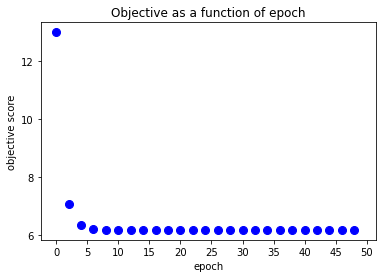

In [11]:
plot_objective_functions(objective_scores)